In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load Fashion MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [4]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

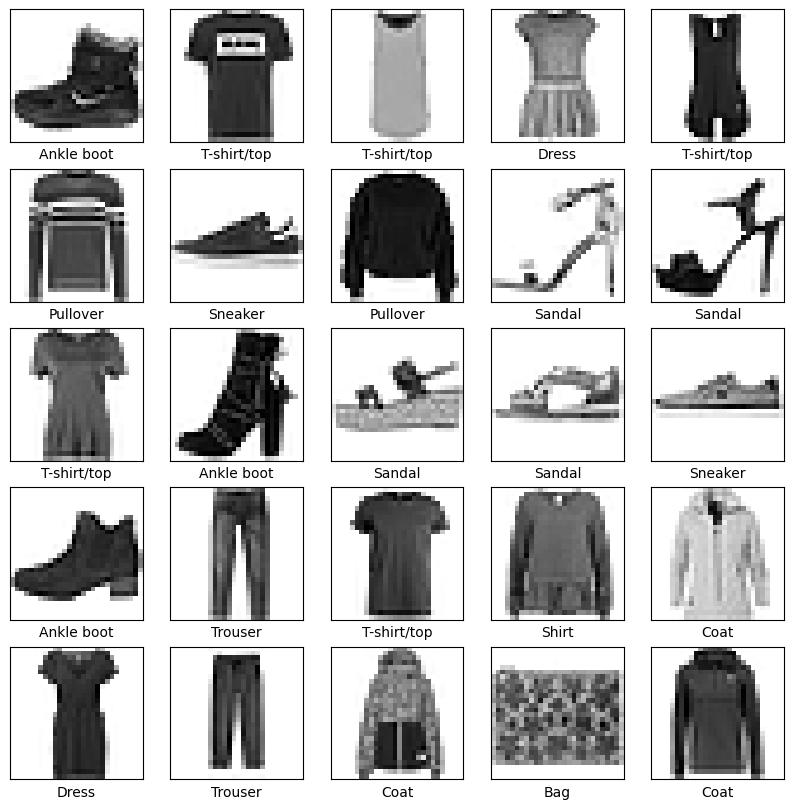

In [5]:
# Visualize the data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
# It decides whether a neuron should be activated (fire) or not based on the input it receives. 
# In short, it adds non-linearity to the network, allowing it to learn complex patterns and relationships in data.

# ReLU is used in hidden layers of neural networks to introduce non-linearity by outputting the input directly if it's positive,

# Softmax is often used in the output layer of a neural network for classification tasks with multiple classes. 
# It converts the raw scores (logits) into probabilities

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 60s 136ms/step - loss: 0.5007 - accuracy: 0.8258 - val_loss: 0.3525 - val_accuracy: 0.8727
Epoch 2/10
422/422 [==============================] - 55s 131ms/step - loss: 0.3336 - accuracy: 0.8825 - val_loss: 0.3024 - val_accuracy: 0.8917
Epoch 3/10
422/422 [==============================] - 56s 133ms/step - loss: 0.2924 - accuracy: 0.8964 - val_loss: 0.2821 - val_accuracy: 0.8993
Epoch 4/10
422/422 [==============================] - 54s 129ms/step - loss: 0.2686 - accuracy: 0.9049 - val_loss: 0.2844 - val_accuracy: 0.9003
Epoch 5/10
422/422 [==============================] - 57s 136ms/step - loss: 0.2522 - accuracy: 0.9098 - val_loss: 0.2686 - val_accuracy: 0.9067
Epoch 6/10
422/422 [==============================] - 58s 137ms/step - loss: 0.2354 - accuracy: 0.9155 - val_loss: 0.2542 - val_accuracy: 0.9095
Epoch 7/10
422/422 [==============================] - 64s 152ms/step - loss: 0.2255 - accuracy: 0.9179 - val_loss: 0.2513 - val_ac

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 7s 17ms/step - loss: 0.2610 - accuracy: 0.9055
Test Accuracy: 0.9054999947547913


In [17]:
# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 4s 10ms/step


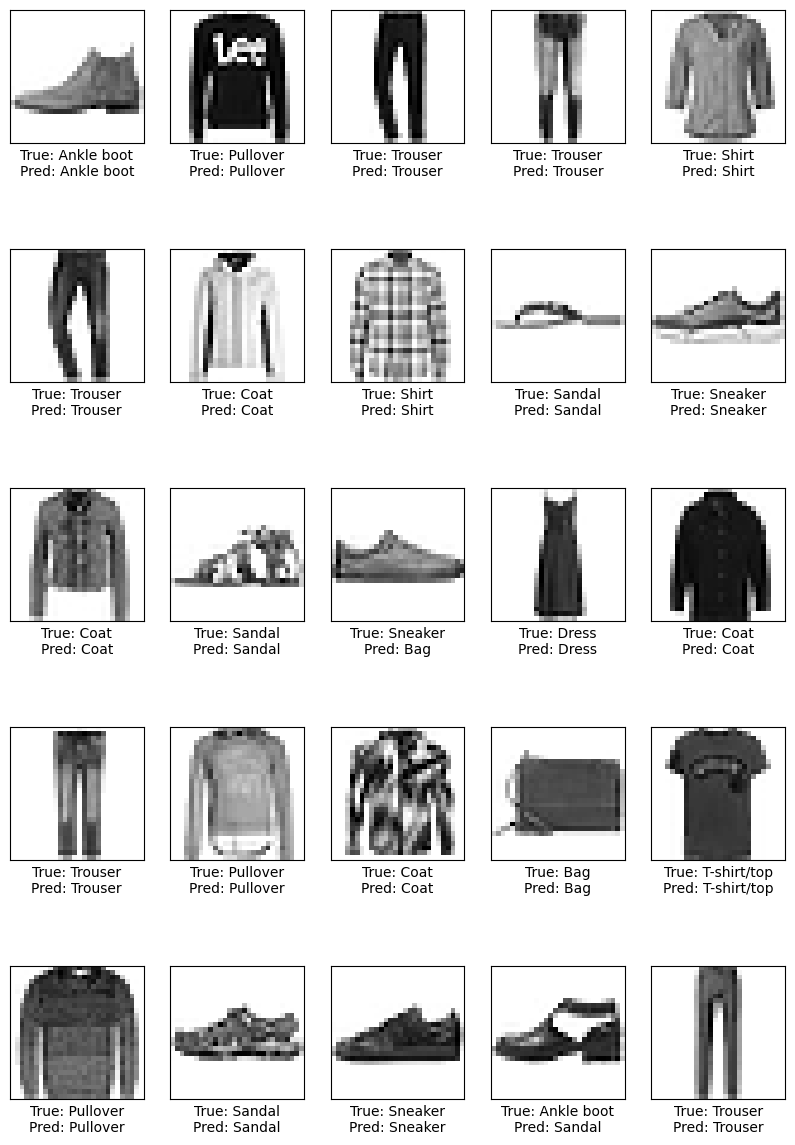

In [15]:
# Display some test images with predictions
plt.figure(figsize=(10, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred_classes[i]]}")
plt.show()

In [12]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.91      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.83      0.87      0.85      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.83      0.87      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.83      0.62      0.71      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000

